# Quality Assessment for ERA5 Drought Indicator

Production date: DD-MM-YYYY

*Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch.*

Produced by: C3S2521 

## 🌍 Use case: Use case listed here in full 

## ❓ Quality assessment question
* **In most cases there should be one question listed here in bold**
* **(In some cases a second related/follow-up question may be included)**

**‘Context paragraph’ (no title/heading)** - a very short introduction before the assessment statement describing approach taken to answer the user question. One or two key references could be useful,  if the assessment summarises literature . These can be referenced directly in the text, like `[Rodriguez et. al. 2018](https://doi.org/10.1038/s41598-018-20628-2)` giving: [Rodriguez et. al. 2018](https://doi.org/10.1038/s41598-018-20628-2). For major references numerical labels like this should be used (which should also listed at the end) `Rodriguez et. al. 2018, [[1]](https://doi.org/10.1038/s41598-018-20628-2))`giving: Rodriguez et. al. 2018, [[1]](https://doi.org/10.1038/s41598-018-20628-2)). Please use DOI links where possible.


## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note
* Finding 1
* Finding 2
* Finding 3
* etc
```

## 📋 Methodology

A ‘free text’ introduction to the data analysis steps or a description of the literature synthesis, with a justification of the approach taken, and limitations mentioned. **Mention which CDS catalogue entry is used, including a link, and also any other entries used for the assessment**.

Followed by a numbered list of the methodology and results, with the same headings as the sections under ‘Analysis and Results’. These should be links to the sections below, using the format `[](section-label)`. The title of the section will be automatically populated, so no need to repeat the title of the section when referecing it like this.

```{note}
The section labels for the links need to be manually set, as seen below (`(section-1)=`, followed by the heading). These labels will be shown in GitHub but will not appear when the Jupyter Book page is built.
```

* These headings can be specific to the quality assessment, and help guide the user through the ‘story’ of the assessment. This means we cannot pre-define the sections and headings here, as they will be different for each assessment.
* Sub-bullets could be used to outline what will be done/shown/discussed in each section
* The list below is just an example, or may need more or fewer sections, with different headings

E.g. 'The analysis and results are organised in the following steps, which are detailed in the sections below:' 

**[](section-1)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-2)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-3)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-4)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.
 
**[](section-5)** 
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

Any further notes on the method could go here (explanations, caveats or limitations).

## 📈 Analysis and results

(section-1)=
### 1. Section 1 title

#### Subsections
Describe what is done in this step/section and what the `code` in the cell does (**if code is included** - some assessment may review literature or reports like PQARs for ECVs, in which case, a markdown file could be provided instead). Note that some details may be better placed in code comments, rather than in the text above the code cell, to help the flow of the Notebook.

**Code:**

* Cell output should be cleaned up as needed (right click the cell after it has run and delete the output if needed), this can also be done with the `'hide-output'` cell tag, added under 'Common Tools -> Cell Tags' on the right in Jupyter Lab (under the cog icon).
* Please consider when cell output would be useful to include, such as printing the summary of the xarray data cube, or an example image. 
* Please link to any non-standard libraries in the references, including the functions from B-Open (a standard line on this is included in the references section).
* The code cells will be adjusted to be 'collapsed by default' when the Jupyter Book page is built.

In [ ]:
# Input / Output
from pathlib import Path
import earthkit.data as ekd
import warnings

# General data handling
import numpy as np
import pandas as pd
import xarray as xr
from functools import partial

# Visualisation
import earthkit.plots as ekp
from earthkit.plots.styles import Style
import matplotlib.pyplot as plt
plt.rcParams["grid.linestyle"] = "--"
from tqdm import tqdm  # Progress bars

# Visualisation in Jupyter book -- automatically ignored otherwise
try:
    from myst_nb import glue
except ImportError:
    glue = None

(section-2)=
### ERA5-Drought SPI

#### Reading in data
Describe what is done in this step/section and what the `code` in the cell does (if code is included).

In [9]:
dataset = "derived-drought-historical-monthly"
request = {
    "variable": ["standardised_precipitation_index"],
    "accumulation_period": [
        "1",
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981",
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020",
        "2021", "2022", "2023",
        "2024", "2025"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ]
}


In [10]:
data_drought = ekd.from_source("cds", dataset, request) # Sends request for this dataset to CDS.
data_drought = data_drought.to_xarray(compat="equals") # Converts to xarray.
data_drought  # Display in notebook 

<xarray.Dataset> Size: 9GB
Dimensions:  (time: 1028, lat: 721, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 8kB 1940-01-01T06:00:00 ... 2025-08-01T06:...
  * lat      (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon      (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
Data variables:
    SPI1     (time, lat, lon) float64 9GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
Attributes: (12/17)
    title:                   SPI1
    description:             Drought Index: Standardized Drought Index calcul...
    Conventions:             CF-1.8
    history:                 Created 13/08/2024 12:16:55 using DRYFALL.
    institution:             European Centre for Medium-Range Weather Forecasts
    source:                  DRYFALL v1.0
    ...                      ...
    climate_start_date:      1991-01-01
    climate_end_date:        2020-12-31
    frequency:               Monthly
    contact_person:          support@ecmwf.int
    ref_publication:         Keune, J., Di Giuseppe, F., Barnard, C., Damasio...
    cds_data_catalogue_url:  https://cds.climate.copernicus.eu/datasets/deriv...

#### Using Earthkit for plotting.

In [ ]:
global_map = data_drought.sel(time="2023-08-01")
fig = ekp.Figure(rows=1, columns=1, size=(5,5)) # Create the figure with dimensions.
subplot = fig.add_map(domain="Europe") # Put in a panel (add_map).
subplot.grid_cells(global_map, z="SPEI12") # Same as pcolormesh. Dataset, Variable.
subplot.legend(location="right")
    
fig.land() 
fig.coastlines()
fig.borders()
fig.gridlines()

# Play around with the ensemble members- how to calculate standard uncertainty between all?
# Creating a filtering function? Say if you wanted to select a range of longitudes and latitudes.
# Creating an animated gif with ensemble members? A slider?

In [ ]:
# Try timeseries for a subset of time.

# time_series = data_drought.sel(time = ["2023-01-01","2023-12-31"],lat=51.5, lon=0.0, method="nearest") # Only plots two datapoints.

# # time_series = data_drought.sel(lat=slice(51,52), lon=0.0, method="nearest") # This did not work as could not use method on range.
# time_series = data_drought.sel(time="2023-01-01",lon=0.0,method="nearest")
# time_series = time_series.sel(lat=slice(54,51)) # Longitude goes from 90 to -90 be careful !!!
# time_series["Wind_Speed_10m_Mean_24h"].plot.line()

time_series = data_drought.sel(lat=25, lon=0.0, method="nearest")
time_series["pzero"].plot.line() 

In [ ]:
# Try downloading a different variable.

# time_series = data_drought.sel(lat=51.5, lon=0.0, method="nearest")
# time_series = data_drought.sel(time="2023-01-01") # This did not work as could not use method on range.

time_series = data_drought.sel(time="2023-01-01",method="nearest")
global_mean = time_series["SPEI1"].mean() # Global mean has been successfully computed, but it's still a lazy Dask array
print(global_mean.compute()) # Triggers to print computation.


time_series["SPEI1"].plot.pcolormesh() # Why did I need to squeeze the dimension here? -> because there can be multiple measurements in a day.
time_series["SPI1"].plot.pcolormesh() 



In [ ]:
# Yearly average at each pixel.

global_mean = data_drought["SPEI12"].mean("time") # Calculates mean along time axis.
fig = ekp.Figure(rows=1, columns=1, size=(5,5)) # Create the figure with dimensions.
subplot = fig.add_map(domain="Europe") # Put in a panel (add_map).
subplot.grid_cells(global_mean, z="SPEI12") # Same as pcolormesh. Dataset, Variable.
subplot.legend(location="right")
    
fig.land() 
fig.coastlines()
fig.borders()
fig.gridlines()

#### Calculating SPI



#### Read in total precipitation data (monthly) from ERA5 analysis.

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import earthkit.data
import numpy as np
import scipy.stats as stats    

In [93]:
lat = 50.75
lng = 4.25

In [94]:
variable = "total_precipitation"
date_range = ["1940-01-01T06:00:00.000000000", "2020-12-31T06:00:00.000000000"]

In [95]:
def retrieve_tp_data(variable, date_range, lat, lng):
    # Define the dataset and request parameters
    dataset = "reanalysis-era5-single-levels-timeseries"
    request = {
        "variable": [
        variable,  # Variable to retrieve
        ],
        "date": date_range,  # Date range for the data
        "location": {"longitude": lng, "latitude": lat},  # Location coordinates
        "data_format": "netcdf"  # Format of the retrieved data
    }

    # Use "earthkit" to retrieve the data
    ekds = earthkit.data.from_source(
        "cds", dataset, request
    ).to_xarray()

    return ekds
data = retrieve_tp_data(variable, date_range, lat, lng)


In [145]:
# Make a function to compute the monthly precipitation climatology
def precipMonthly(data):
    """
    Calculate the monthly climatology of precipitation.

    This function reads precipitation data from a NetCDF file,
    converts the time coordinate to a pandas datetime index,
    and then resamples the data to calculate the monthly 
    climatology. The resulting climatology is returned in millimeters.

    Returns:
        pandas.DataFrame: A DataFrame containing the monthly climatology
        of precipitation in millimeters, indexed by month.
    """
    
    data_tp_pt = data.tp # Accessing total precipitation.

    # Convert the time coordinate to a pandas datetime index
    time_index = pd.to_datetime(data_tp_pt.valid_time.values)

    # Create a DataFrame for easier manipulation
    df = pd.DataFrame(data_tp_pt.values*1000, index=time_index, columns=['tp (mm)'])

    df_monthly = df.resample('MS').sum() # .gives monthly totals by summing precipitation within each month.
    df_monthly['month'] = df_monthly.index.month # Extracts the month number (1–12) from the index and adds it as a column.
    monthly_climatology = df_monthly.groupby('month').mean()

    # Get the actual lat/lon used
    nearest_lat = data_tp_pt.latitude.values
    nearest_lng = data_tp_pt.longitude.values

    return df_monthly, monthly_climatology, nearest_lat, nearest_lng

# Call our function
df_monthly, clim, nearest_lat, nearest_lng = precipMonthly(data)

#### Calculate moving average for different accumulation periods.

In [101]:
acc_periods = [1, 3, 6, 12, 24, 36, 48]

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

# Does xarray have a moving window.

for period in acc_periods:
    x = df_monthly['tp (mm)'].values
    conv_result = moving_average(x,period)  # rolling average
    
    # Create an array of full length with NaNs
    aligned = np.full(len(df_monthly), np.nan)
    
    # Place convolution result starting at index period-1
    aligned[period-1:] = conv_result
    
    df_monthly[f"Accumulation-{period} months"] = aligned

#### Plot of accumulation periods (1 to 48) months

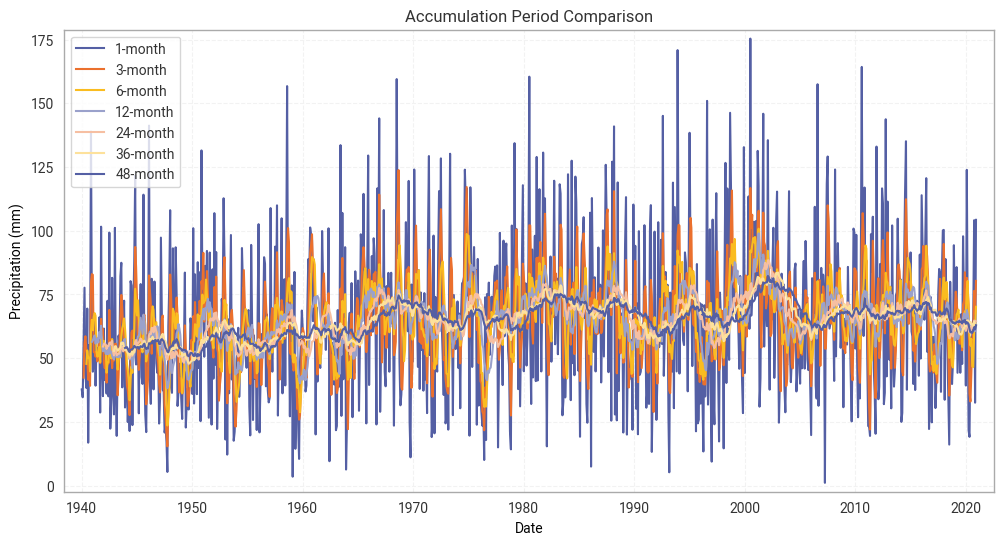

In [102]:
plt.figure(figsize=(12, 6))
for period in acc_periods:
    plt.plot(df_monthly.index, df_monthly[f"Accumulation-{period} months"], label=f"{period}-month")
plt.title("Accumulation Period Comparison")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.legend()
plt.grid(True)
plt.show()

#### Fitting gamma distribution to different accumulation periods.

In [103]:
acc_periods = [1,3,6,12,24, 36, 48]

start_ref, end_ref  = "1991-01-01", "2020-12-01"

# Dictionary to store fitted parameters for each period
gamma_params = {}

def fit_gamma_distributions(df, acc_periods, start_ref, end_ref):
    
    # Function to fit gamma distribution on any precipitation dataframe.
    for period in acc_periods:
        reference_data = df.loc[start_ref:end_ref, f"Accumulation-{period} months"].dropna()
        alpha, loc, beta = stats.gamma.fit(reference_data)
        gamma_params[period] = (alpha, loc, beta)
    return gamma_params # returns the gamma paramaters, associated with that period.

def compute_spi_series(df, acc_periods, gamma_params): 
    # Function to compute SPI time series from dataframe, period and gamma parameters.
    spi_df = pd.DataFrame(index=df.index)
    for period in acc_periods:
        alpha, loc, beta = gamma_params[period]
        data = df[f"Accumulation-{period} months"]
        spi_values = stats.norm.ppf(stats.gamma.cdf(data, a=alpha, loc=loc, scale=beta),loc=0, scale=1)
        spi_df[f"SPI-{period}"] = spi_values
    return spi_df # returns SPI dataframe.

def compute_spi(value, acc_period):
    # Function to compute SPI for any tp value in any period.
    alpha, loc, beta = gamma_params[acc_period]
    # Compute CDF under gamma
    cdf = stats.gamma.cdf(value, a=alpha, loc=loc, scale=beta)
    # Convert to standard normal
    spi = stats.norm.ppf(cdf, loc=0, scale=1)
    return spi # returns SPI single value.

def get_spi_for_month(spi_df, date, acc_period):
    # Function to return SPI for any month in any accumulation period.
    return spi_df.loc[date, f"SPI-{acc_period}"]

def plot_spi_series(spi_series, acc_periods):
    # Function to plot SPI series.
    plt.figure(figsize=(12, 6))
    for period in acc_periods:
        plt.plot(spi_series.index, spi_series[f"SPI-{period}"], label=f"SPI-{period}")
    plt.legend()
    plt.title("Standardized Precipitation Index")
    plt.xlabel("Date")
    plt.ylabel("SPI Value")
    plt.grid(True)
    plt.show()

def compute_spi_tp(spi_df,acc_periods, gamma_params):
    # Function to compute the SPI vs tp.
    spi_results = {}
    pdf_spi_values = {}
    cdf_spi_values = {}
    
    for period in acc_periods:
        col_name = f"SPI-{period}"
        data = spi_df[col_name]
        x = np.linspace(0, 200, 400)
        alpha, loc, beta = gamma_params[period]
        
        pdf_spi_values[period] = stats.gamma.pdf(x, a=alpha, loc=loc, scale=beta)
        cdf_spi_values[period] = stats.gamma.cdf(x, a=alpha, loc=loc, scale=beta)
        spi_values = stats.norm.ppf(stats.gamma.cdf(x, a=alpha, loc=loc, scale=beta),loc=0, scale=1)
        
        spi_results[period] = (spi_values) 
        
    return spi_results, pdf_spi_values, cdf_spi_values # returns SPI results as dictionary with period.

def plot_spi_tp(spi_tp, acc_periods):
    plt.figure(figsize=(12, 6))
    for period in acc_periods:
        plt.plot( spi_tp[period], label=f"SPI-{period}")
    plt.legend()
    plt.title("Standardized Precipitation Index")
    plt.xlabel("Total Precipitation (mm)")
    plt.ylabel("SPI Value")
    plt.ylim([-8,8])
    plt.grid(True)
    plt.show()

# Function that takes dataset and fits gamma distribution -> will also include zero values.
# Look at ensemble for uncertainty.
# Calculating the SPEI too.
# Visual comparison of differences test at multiple locations.
# Look at the quality test.
# The zero precipitation adjustment.
# Look at the ensemble. 
# Plot of uncertainty in precipitation in x axis and uncertainty in SPI in y axis for ensemble.
# How does uncertainty in reference period affect uncertainty in SPI.- all the same for SPEI.

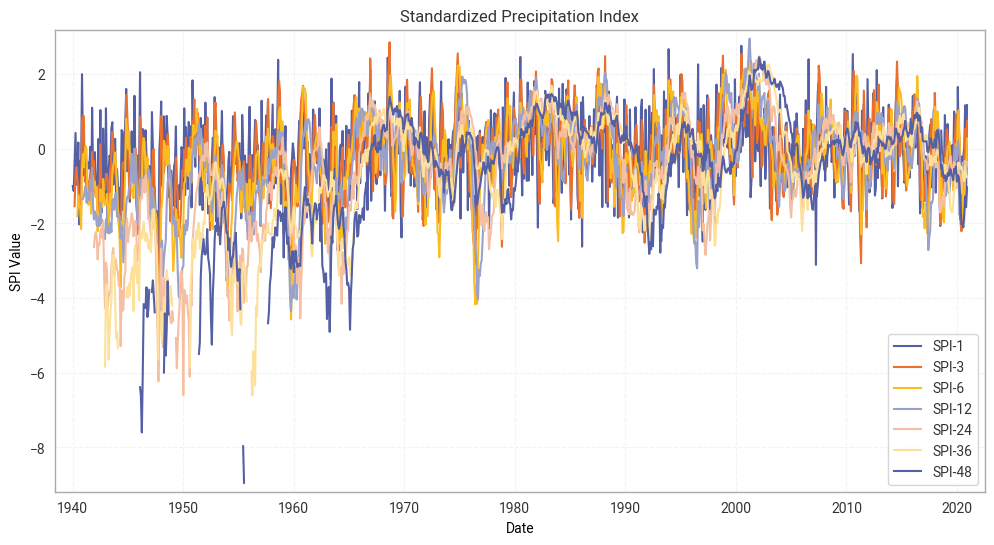

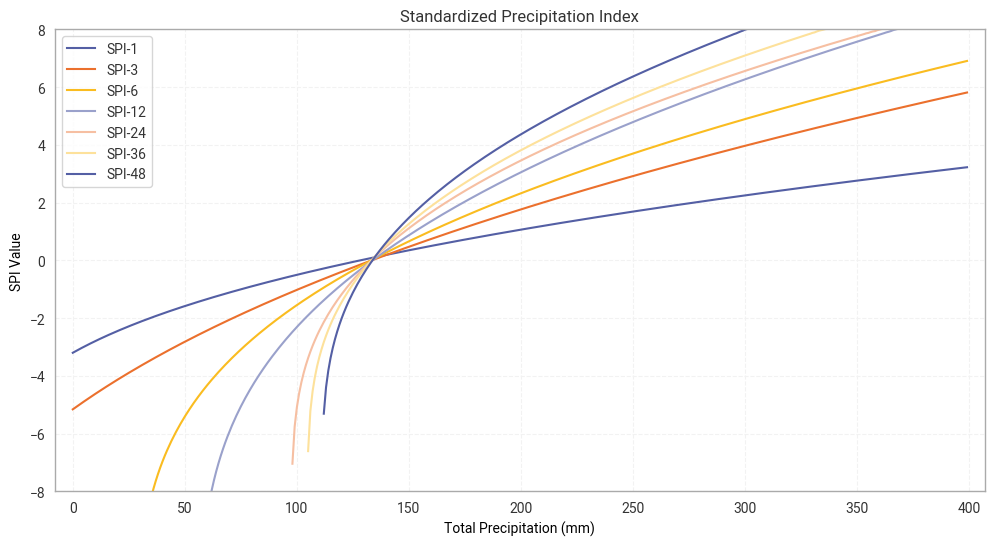

In [104]:
# 1. Fit gamma distributions
gamma_params = fit_gamma_distributions(df_monthly, acc_periods, start_ref, end_ref)

# 2. Compute SPI DataFrame
spi_df = compute_spi_series(df_monthly, acc_periods, gamma_params)

# 2.1 Compute SPI vs tp curve
spi_tp, pdf_spi, cdf_spi = compute_spi_tp(spi_df, acc_periods, gamma_params)

# 3. Plot SPI time series
plot_spi_series(spi_df, acc_periods)

# 4. Plot SPI precipitation curve
plot_spi_tp(spi_tp, acc_periods)

# 5. Query SPI for a specific month
spi_value = get_spi_for_month(spi_df, "2003-07-01", 1)

#### Locations with zero precipitation months.

#### Check calculated SPI against given (one location).

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import earthkit.data
import numpy as np
import scipy.stats as stats    

In [177]:
dataset = "derived-drought-historical-monthly"

request1 = {
    "variable": ["standardised_precipitation_index"],
    "accumulation_period": [
        "1",
        "3",
        "6",
        "12",
        "24",
        "36",
        "48"
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "area": [51.11, 4.1, 50.61, 4.6]
}

request2 = {
    "variable": ["standardised_precipitation_index"],
    "accumulation_period": [
        "1",
        "3",
        "6",
        "12",
        "24",
        "36",
        "48"
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1981", "1982", "1983",
        "1984", "1985", "1986",
        "1987", "1988", "1989",
        "1990", "1991", "1992",
        "1993", "1994", "1995",
        "1996", "1997", "1998",
        "1999", "2000", "2001",
        "2002", "2003", "2004",
        "2005", "2006", "2007",
        "2008", "2009", "2010",
        "2011", "2012", "2013",
        "2014", "2015", "2016",
        "2017", "2018", "2019",
        "2020"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "area": [51.11, 4.1, 50.61, 4.6]
}


In [ ]:
data_drought = ekd.from_source("cds", dataset, request1,request2) # Sends request for this dataset to CDS.
data_drought = data_drought.to_xarray(compat="equals") # Converts to xarray.

  0%|                                                                                                          | 0/2 [00:00<?, ?it/s]2025-11-10 17:22:48,545 WARNING [2025-10-30T00:00:00] Downloading data from this dataset requires that the user be registered with the CDS. The use of the API requires a CDS API key.
2025-11-10 17:22:48,549 INFO Request ID is c4e9a278-809e-4d66-9508-9b7a53ead277
2025-11-10 17:22:48,628 INFO status has been updated to accepted
2025-11-10 17:22:48,900 WARNING [2025-10-30T00:00:00] Downloading data from this dataset requires that the user be registered with the CDS. The use of the API requires a CDS API key.
2025-11-10 17:22:48,901 INFO Request ID is 163247fb-fe6b-40af-8f06-55369b742768
2025-11-10 17:22:48,971 INFO status has been updated to accepted
2025-11-10 17:22:57,045 INFO status has been updated to running
2025-11-10 17:22:57,404 INFO status has been updated to running
2025-11-10 17:51:11,145 INFO status has been updated to successful

2dd21c34c6b0a73

In [112]:
data_drought = data_drought.sel(lat=50.75, lon=4.25)
data_drought

<xarray.Dataset> Size: 13kB
Dimensions:  (time: 204)
Coordinates:
  * time     (time) datetime64[ns] 2kB 1940-01-01T06:00:00 ... 2020-12-01T06:...
    lat      float64 8B 50.75
    lon      float64 8B 4.25
Data variables:
    SPI12    (time) float64 2kB dask.array<chunksize=(1,), meta=np.ndarray>
    SPI1     (time) float64 2kB dask.array<chunksize=(1,), meta=np.ndarray>
    SPI24    (time) float64 2kB dask.array<chunksize=(1,), meta=np.ndarray>
    SPI36    (time) float64 2kB dask.array<chunksize=(1,), meta=np.ndarray>
    SPI3     (time) float64 2kB dask.array<chunksize=(1,), meta=np.ndarray>
    SPI48    (time) float64 2kB dask.array<chunksize=(1,), meta=np.ndarray>
    SPI6     (time) float64 2kB dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/17)
    title:                   SPI12
    description:             Drought Index: Standardized Drought Index calcul...
    Conventions:             CF-1.8
    history:                 Created 13/08/2024 14:50:11 using DRYFALL.
    institution:             European Centre for Medium-Range Weather Forecasts
    source:                  DRYFALL v1.0
    ...                      ...
    climate_start_date:      1991-01-01
    climate_end_date:        2020-12-31
    frequency:               Monthly
    contact_person:          support@ecmwf.int
    ref_publication:         Keune, J., Di Giuseppe, F., Barnard, C., Damasio...
    cds_data_catalogue_url:  https://cds.climate.copernicus.eu/datasets/deriv...

In [148]:
def calculated_spi_to_xarray(df):
    """
    Convert a pandas DataFrame of SPI values into an xarray Dataset.

    Args:
        df (pandas.DataFrame): DataFrame with columns like SPI-1, SPI-3, ..., SPI-48
                               and datetime index.

    Returns:
        xarray.Dataset: Dataset with dimensions (time) and variables for each SPI period.
    """

    # Create a dictionary of variables for xarray
    data_vars = {}
    for col in df.columns:
        var_name = col.replace("-","") 
        data_vars[var_name] = (["time"], df[col].values)

    # Build the Dataset
    ds = xr.Dataset(
        data_vars=data_vars,
        coords={"time": df.index}
    )

    
    # Add 6 hours to all time coordinates otherwise they don't match!
    ds['time'] = ds['time'] + np.timedelta64(6, 'h')

    return ds

spi_calculated = calculated_spi_to_xarray(spi_df)

In [159]:
spi_calculated, data_drought = xr.align(spi_calculated, data_drought, join="inner")  # keep only matching times
result = (spi_calculated - data_drought).compute()

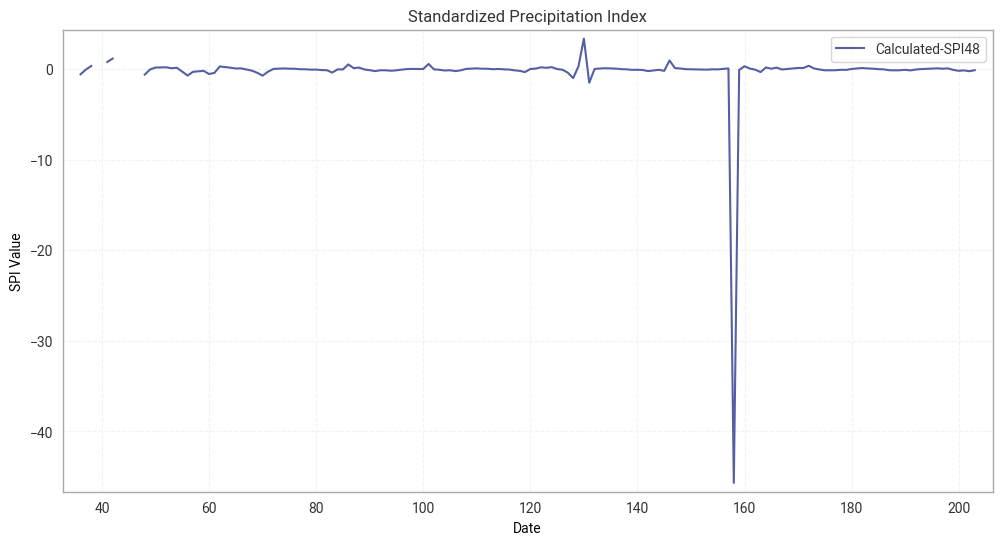

In [171]:
plt.figure(figsize=(12, 6))
acc_periods=[48]
for period in acc_periods:
    plt.plot(spi_calculated[f"SPI{period}"]/data_drought[f"SPI{period}"] - 1, label=f"Calculated-SPI{period}")
    # plt.plot(data_drought[f"SPI{period}"], label=f"ECMWF-SPI{period}")

plt.legend()
plt.title("Standardized Precipitation Index")
plt.xlabel("Date")
plt.ylabel("SPI Value")
plt.grid(True)
plt.show()

#### Calculating SPEI

In [ ]:
lat = 50.75
lng = 4.25
variable = "total_precipitation"
date_range = ["1940-01-01", "2020-12-31"]

In [ ]:
data = retrieve_data(variable, date_range, lat, lng)

(section-3)=
### 3. Section 3 title
#### Subsections
Describe what is done in this step/section and what the `code` in the cell does (if code is included).

In [ ]:
# collapsable code cells

# code is included for transparency but also learning purposes and gives users the chance to adapt the code used for the assessment as they wish

(section-4)=
### 4. Section 4 title

#### Subsections
Describe what is done in this step/section and what the `code` in the cell does(if code is included).

In [ ]:
# collapsable code cell

# code is included for transparency but also learning purposes and gives users the chance to adapt the code used for the assessment as they wish

(section-5)=
### 5. Section 5 title 

#### Results Subsections
Describe what is done in this step/section and what the `code` in the cell does (if code is included). 

If this is the **results section**, we expect the final plots to be created here with a description of how to interpret them, and what information can be extracted for the specific use case and user question. The information in the 'quality assessment statement' should be derived here. 

In [ ]:
# collapsable code cell

# code is included for transparency but also learning purposes and gives users the chance to adapt the code used for the assessment as they wish

## ℹ️ If you want to know more

### Key resources

List some key resources related to this assessment. E.g. CDS entries, applications, dataset documentation, external pages.
Also list any code libraries used (if applicable).

Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [B-Open](https://www.bopen.eu/)

### References

List the references used in the Notebook here.

E.g.

[[1]](https://doi.org/10.1038/s41598-018-20628-2) Rodriguez, D., De Voil, P., Hudson, D., Brown, J. N., Hayman, P., Marrou, H., & Meinke, H. (2018). Predicting optimum crop designs using crop models and seasonal climate forecasts. Scientific reports, 8(1), 2231.